In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

C:\Users\test\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


$\Large\text{Data load}$

In [2]:
path_folder = 'TOP4040/'

In [3]:
folder = Path(path_folder)

In [4]:
data = np.load(path_folder + '2.npz')['arr_0']

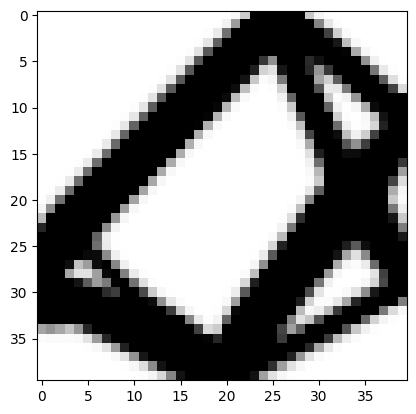

In [5]:
plt.imshow(data[-1], cmap='Greys')

$\Large\text{Examples of tensor usage}$

In [6]:
x = torch.rand(6,6)
x

tensor([[0.7230, 0.9547, 0.5125, 0.4279, 0.6379, 0.4717],
        [0.7947, 0.7790, 0.1155, 0.5925, 0.9860, 0.3718],
        [0.8951, 0.8914, 0.4814, 0.3865, 0.7055, 0.0712],
        [0.0590, 0.1548, 0.2814, 0.6071, 0.5016, 0.0495],
        [0.1200, 0.8720, 0.9247, 0.4300, 0.5420, 0.1988],
        [0.0067, 0.1674, 0.6451, 0.1979, 0.4877, 0.9514]])

In [7]:
x.view(36)

tensor([0.7230, 0.9547, 0.5125, 0.4279, 0.6379, 0.4717, 0.7947, 0.7790, 0.1155,
        0.5925, 0.9860, 0.3718, 0.8951, 0.8914, 0.4814, 0.3865, 0.7055, 0.0712,
        0.0590, 0.1548, 0.2814, 0.6071, 0.5016, 0.0495, 0.1200, 0.8720, 0.9247,
        0.4300, 0.5420, 0.1988, 0.0067, 0.1674, 0.6451, 0.1979, 0.4877, 0.9514])

In [8]:
x.view(3,12)

tensor([[0.7230, 0.9547, 0.5125, 0.4279, 0.6379, 0.4717, 0.7947, 0.7790, 0.1155,
         0.5925, 0.9860, 0.3718],
        [0.8951, 0.8914, 0.4814, 0.3865, 0.7055, 0.0712, 0.0590, 0.1548, 0.2814,
         0.6071, 0.5016, 0.0495],
        [0.1200, 0.8720, 0.9247, 0.4300, 0.5420, 0.1988, 0.0067, 0.1674, 0.6451,
         0.1979, 0.4877, 0.9514]])

In [9]:
x.view(-1, 12) # -1 , python automatically calculate the size

tensor([[0.7230, 0.9547, 0.5125, 0.4279, 0.6379, 0.4717, 0.7947, 0.7790, 0.1155,
         0.5925, 0.9860, 0.3718],
        [0.8951, 0.8914, 0.4814, 0.3865, 0.7055, 0.0712, 0.0590, 0.1548, 0.2814,
         0.6071, 0.5016, 0.0495],
        [0.1200, 0.8720, 0.9247, 0.4300, 0.5420, 0.1988, 0.0067, 0.1674, 0.6451,
         0.1979, 0.4877, 0.9514]])

In [10]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [11]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [12]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
a.add_(5)
a

tensor([6., 6., 6., 6., 6.])

In [14]:
b

array([6., 6., 6., 6., 6.], dtype=float32)

In [15]:
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [16]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [17]:
type(x[0].item())

float

$\Large\text{Gradient calculation with autograd}$

In [18]:
x = torch.randn(3, requires_grad = True)
x

tensor([-0.1489, -0.2477, -1.0269], requires_grad=True)

In [19]:
y = x + 2
y

tensor([1.8511, 1.7523, 0.9731], grad_fn=<AddBackward0>)

In [20]:
z = y**2*2
# z = z.mean()

In [21]:
# z.backward() #dz/dx
# print(x.grad)

In [22]:
# What if we dont specify z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # in the backward it is vector jacobian product
print(x.grad) 

tensor([7.4045e-01, 7.0092e+00, 3.8922e-03])


In [23]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [24]:
x.requires_grad_(False) # Whenever our function has _ at the end it means that is modified our variable inplace
x # Now x does not have requires_grad=True
# The same will be with y = x.detach()
# with torch.no_grad():
#    y = x + 2 

tensor([-0.1489, -0.2477, -1.0269])

$\text{Whenever we call backward function then the gradient for this tensor will be accumulated into the dot grad attribute, the values will be summed up}$ 

In [25]:
weights = torch.ones(4 , requires_grad=True)

$\text{Before we do the next iteration or optimiztion we must empty the gradients}$

In [26]:
for epoch in range(4):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # Empty 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [27]:
#With optimization

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

$\Large\text{Backpropagation}$

In [28]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad = True)


In [29]:
#forward pass and compute the loss

In [30]:
y_hat = w*x
loss = (y_hat- y) **2
loss

tensor(1., grad_fn=<PowBackward0>)

In [31]:
# Backward pass
loss.backward()
w.grad

tensor(-2.)

$\text{Next we have to update our weights and next forward and backkward}$

$\Large\text{Gradient Descent with Autograd and Backpropagation}$

$\text{Manually}$

In [32]:
def forward(x):
    
    return w * x

In [33]:
def loss(y, y_pred):
    
    return ((y - y_pred)**2).mean()

In [34]:
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y, y_pred):
    
    return np.dot(2*x, y_pred - y).mean()

In [35]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 5.000


In [36]:
learning_rate = 0.01
n_iters = 10

In [37]:
X = np.array(list(range(1,5)), dtype = np.float32)
Y = X.copy()*2
w = 0.0

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    dw = gradient(X,Y, y_pred)
    
    #update weights
    
    w = w - learning_rate*dw
    
    if epoch%1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        


epoch 1: w = 1.200, loss = 30.00000000, dw = -120.0
epoch 2: w = 1.680, loss = 4.79999924, dw = -47.999996185302734
epoch 3: w = 1.872, loss = 0.76800019, dw = -19.200002670288086
epoch 4: w = 1.949, loss = 0.12288000, dw = -7.679999828338623
epoch 5: w = 1.980, loss = 0.01966083, dw = -3.072002649307251
epoch 6: w = 1.992, loss = 0.00314574, dw = -1.2288014888763428
epoch 7: w = 1.997, loss = 0.00050331, dw = -0.4915158748626709
epoch 8: w = 1.999, loss = 0.00008053, dw = -0.1966094970703125
epoch 9: w = 1.999, loss = 0.00001288, dw = -0.07864165306091309
epoch 10: w = 2.000, loss = 0.00000206, dw = -0.03145551681518555


In [38]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 9.999


$\text{Gradients computation with Autograd}$

In [59]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = X*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 20
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad(): 
        w-= w.grad*learning_rate
    # zero gradients
    w.grad.zero_()
    if epoch%2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000, dw = -0.03145551681518555
epoch 3: w = 0.772, loss = 15.66018772, dw = -0.03145551681518555
epoch 5: w = 1.113, loss = 8.17471695, dw = -0.03145551681518555
epoch 7: w = 1.359, loss = 4.26725292, dw = -0.03145551681518555
epoch 9: w = 1.537, loss = 2.22753215, dw = -0.03145551681518555
epoch 11: w = 1.665, loss = 1.16278565, dw = -0.03145551681518555
epoch 13: w = 1.758, loss = 0.60698116, dw = -0.03145551681518555
epoch 15: w = 1.825, loss = 0.31684780, dw = -0.03145551681518555
epoch 17: w = 1.874, loss = 0.16539653, dw = -0.03145551681518555
epoch 19: w = 1.909, loss = 0.08633806, dw = -0.03145551681518555
Prediction before training: f(5) = 9.612
